In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (x0 = 1)
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)


In [2]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = X_b.shape[0]  # number of samples

# Initialize weights randomly
theta = np.random.randn(2, 1)  # (bias and weight)

# Gradient descent loop
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

print("Learned parameters (theta):")
print(theta)


Learned parameters (theta):
[[4.21509616]
 [2.77011339]]


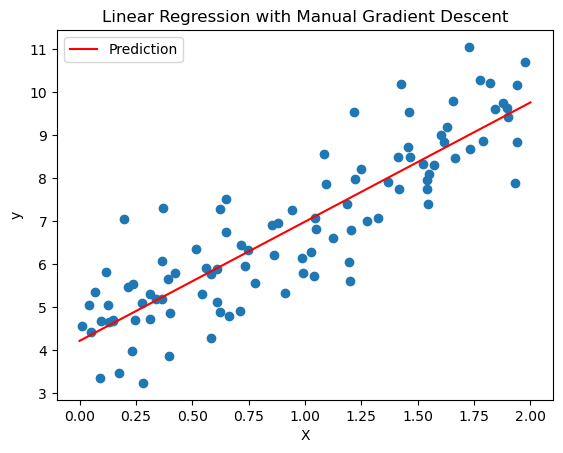

In [3]:

# Plotting the regression line
plt.scatter(X, y)
X_test = np.array([[0], [2]])
X_test_b = np.c_[np.ones((2, 1)), X_test]
y_pred = X_test_b.dot(theta)
plt.plot(X_test, y_pred, "r-", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Manual Gradient Descent")
plt.legend()
plt.show()


In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Scaling is important for SGD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SGD Regressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1, learning_rate="constant", random_state=42)
sgd_reg.fit(X_scaled, y.ravel())

print("Learned parameters (theta):")
print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)


Learned parameters (theta):
Intercept: [6.88272137]
Coefficient: [1.62281182]


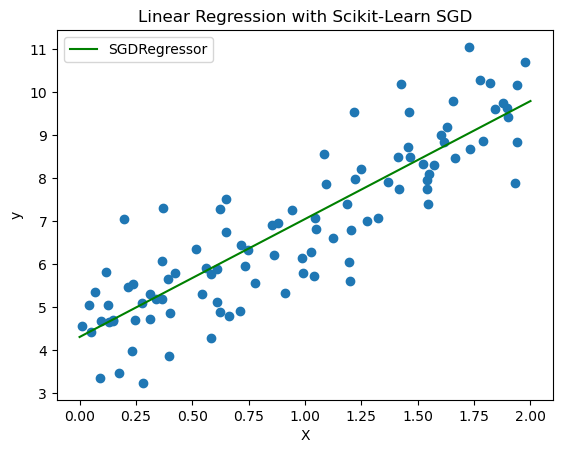

In [5]:
X_test_scaled = scaler.transform(X_test)
y_sklearn_pred = sgd_reg.predict(X_test_scaled)

plt.scatter(X, y)
plt.plot(X_test, y_sklearn_pred, "g-", label="SGDRegressor")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Scikit-Learn SGD")
plt.legend()
plt.show()


/usr/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: Converg

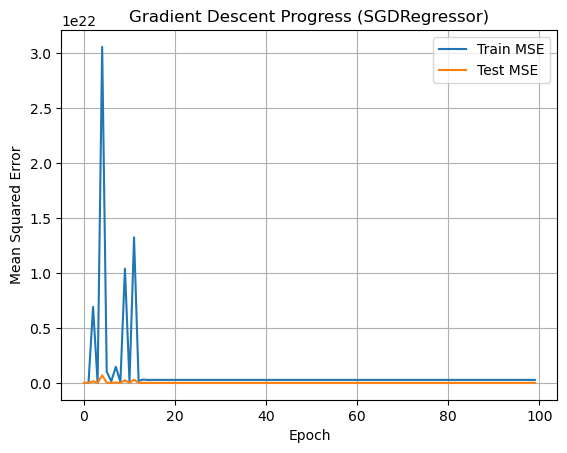

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Track loss per epoch
epochs = 100
train_losses = []
test_losses = []

# Custom SGD training loop
sgd = SGDRegressor(max_iter=1,             # One epoch at a time
                   warm_start=True,        # Keep weights between epochs
                   eta0=0.01,
                   learning_rate='constant',
                   random_state=42,
                   penalty=None)

for epoch in range(epochs):
    sgd.fit(X_train_scaled, y_train)
    
    # Predict and compute loss
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)

# Plot loss vs epochs
plt.plot(range(epochs), train_losses, label="Train MSE")
plt.plot(range(epochs), test_losses, label="Test MSE")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Progress (SGDRegressor)")
plt.legend()
plt.grid(True)
plt.show()
